In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/rl_1_20210201-212248_traj.csv")

In [3]:
print(data)
num = 1
new_data = [None]*num
for i in range(num):
    new_data[i] = data[data["ID"] == i]
    new_data[i] = new_data[i][["time","ID", "x", "y"]]


    time  ID     x     y
0    0.2   0  0.07  0.00
1    0.8   0  0.16  0.02
2    1.3   0  0.39  0.10
3    1.9   0  0.71  0.15
4    2.5   0  1.05  0.09
5    3.0   0  1.32 -0.13
6    3.6   0  1.59 -0.31
7    4.1   0  1.92 -0.43
8    4.7   0  2.25 -0.50
9    5.2   0  2.60 -0.49
10   5.8   0  2.92 -0.37
11   6.3   0  3.26 -0.25
12   6.9   0  3.61 -0.15


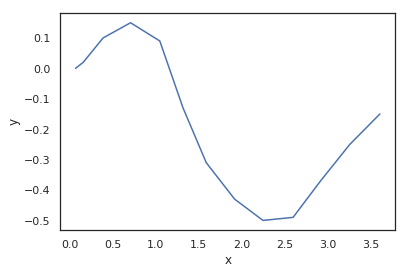

In [4]:
sns.set(style="white")
traj_plot = sns.lineplot(data=new_data[0], x="x", y="y")

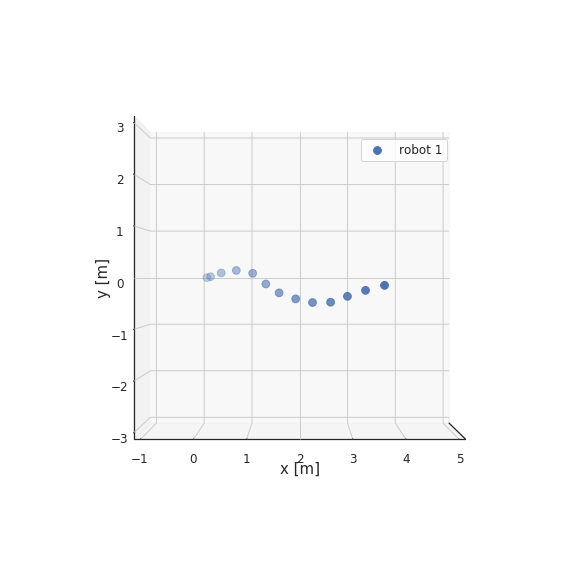

In [5]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = new_data[0]['time']
y = new_data[0]['x']
z = new_data[0]['y']



#ax.set_xlabel("time")
ax.set_ylabel("x [m]", fontsize = 15)
ax.set_zlabel("y [m]", fontsize = 15)

fig.set_figheight(10)
fig.set_figwidth(10)


ax.scatter(x, y, z, label="robot 1", s=60)

ax.set_ylim([-1, 5])
ax.set_zlim([-3, 3])
#ax.set_top_view()
ax.view_init(0,0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.780), fontsize=12)

#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.show()

In [6]:
from math import *
# Calculate the distance of trajectories
x_arr = [None]*num
y_arr = [None]*num
x = [None]*num
y = [None]*num
traj_dist = [0.0]*num
euclidean_dist = [0.0]*num
for i in range(num):
    x_arr[i] = new_data[i]["x"]
    y_arr[i] = new_data[i]["y"]
    x[i] = x_arr[i].to_numpy()
    y[i] = y_arr[i].to_numpy()
#print(x)
#print(y)
#print(len(new_data[0])-1)
for i in range(len(new_data[0])-1):
    for j in range(num):
        #print(x_arr[j])
        traj_dist[j] += sqrt((x[j][i]-x[j][i+1])**2+(y[j][i]-y[j][i+1])**2)
        

for j in range(num):
    #print(x_arr[j])
    euclidean_dist[j] += sqrt((x[j][0]-x[j][-1])**2+(y[j][0]-y[j][-1])**2)
print(traj_dist)
print(euclidean_dist)
print(np.average(np.array(euclidean_dist)/np.array(traj_dist)))



[3.782575845808047]
[3.5431765409022455]
0.9367099789496328
